# ELI5
## MADRAS SCIENTIFIC RESEARCH FOUNDATION
### Author - Vinay Khanduri

### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import eli5 as eli

### Importing the dataset

In [2]:
df = pd.read_csv("dataset/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.shape

(400, 5)

The dataset was imported successfully!

### Data Pre-Processing

First let's check whether the dataset is free of any null values or not...

In [4]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Therefore, the dataset has no null values!

Now, since we don't need to **User ID** column in the dataset, we can just drop it.!

In [5]:
df.drop('User ID', axis=1, inplace=True)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


C:\Users\vinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


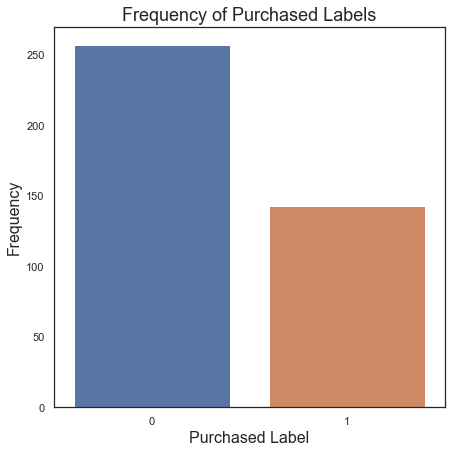

In [6]:
sns.set(rc={'figure.figsize':(7, 7)})
sns.set_style('white')
sns.countplot(df['Purchased'])
plt.xlabel('Purchased Label', size=16)
plt.ylabel('Frequency', size=16)
plt.title('Frequency of Purchased Labels', size=18)
plt.show()

Therefore, the dataset isn't imbalanced!

Now, let's encode the categorical feature variable in our class i.e. **Gender** using LabelEncoder()

In [7]:
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


The **Gender** column was encoded successfully!

Now let's split the dataset for training and testing...

In [8]:
X = df.drop('Purchased', axis=1)
y = df['Purchased']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(320, 3) (80, 3) (320,) (80,)


### Training the model

In [10]:
classifier = DecisionTreeClassifier()
classifier_model = classifier.fit(X_train, y_train)

The model was trained succesfully!

Now let's evaluate the performance of the model...

### Evaluating the performance of the model

In [11]:
y_pred = classifier_model.predict(X_test)
print('Confusion Matrix: ')
print()
print(confusion_matrix(y_test, y_pred))
print()
print('Classification Report: ')
print()
print(classification_report(y_test, y_pred))

Confusion Matrix: 

[[44  8]
 [ 1 27]]

Classification Report: 

              precision    recall  f1-score   support

           0       0.98      0.85      0.91        52
           1       0.77      0.96      0.86        28

    accuracy                           0.89        80
   macro avg       0.87      0.91      0.88        80
weighted avg       0.91      0.89      0.89        80



The model gave us an accuracy of 90%, which is amazing!

Now let's find out how exactly our model came to this conclusion and this accuracy!

### Interpreting the model

To see and understand the weights used in the Decision Tree, we can use the explain_weights function...

In [12]:
eli.explain_weights(classifier, feature_names=list(X.columns))

Weight,Feature
0.5064,Age
0.4498,EstimatedSalary
0.0438,Gender


To debug a particular row, we can use the explain_prediction function...

In [13]:
eli.explain_prediction(classifier_model, np.array(X_test)[1], feature_names=list(X.columns))

Explanation(estimator='DecisionTreeClassifier()', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=False, targets=[TargetExplanation(target=1, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='EstimatedSalary', weight=0.4042475447571596, std=None, value=71000.0), FeatureWeight(feature='<BIAS>', weight=0.359375, std=None, value=1.0), FeatureWeight(feature='Age', weight=0.23637745524284035, std=None, value=37.0)], neg=[], pos_remaining=0, neg_remaining=0), proba=1.0, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

To understand the model even further, we can also see the value of the features along with their contribution to the prediction by setting the show_feature_values parameter to True in the show_prediction function...

In [14]:
eli.show_prediction(classifier_model, np.array(X_test)[1], feature_names=list(X.columns), show_feature_values=True)

In [15]:
eli.show_prediction(classifier_model, np.array(X_test)[5], feature_names=list(X.columns), show_feature_values=True)